In [3]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Regression line vs other lines

In [35]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

## Residuals

In [36]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [37]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [7]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


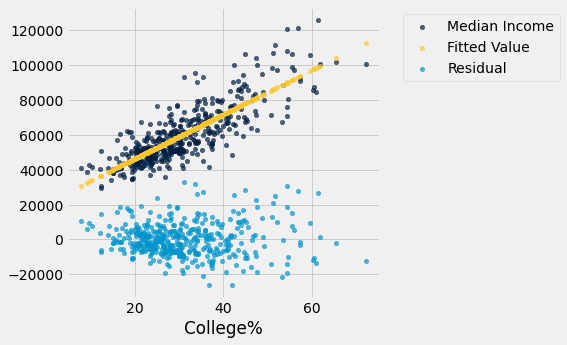

In [8]:
demographics.scatter('College%')

In [9]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

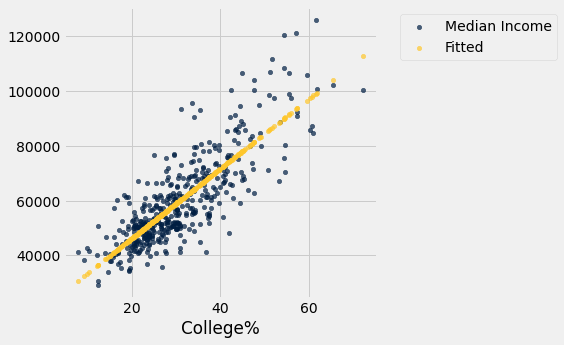

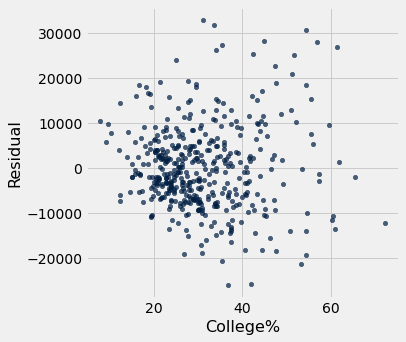

In [10]:
plot_residuals(demographics, 'College%', 'Median Income')

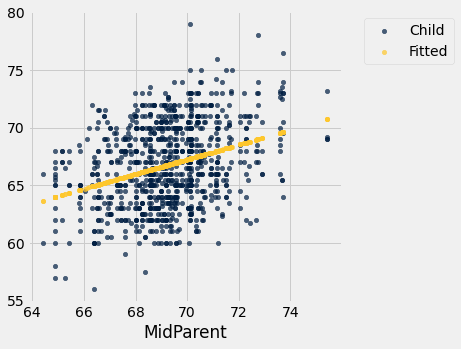

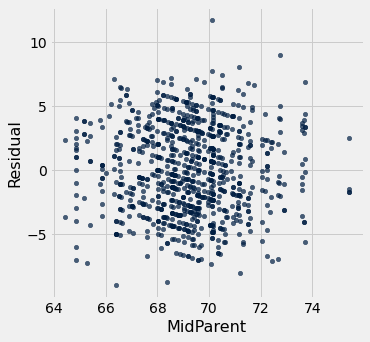

In [11]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

## Dugongs ##

In [12]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


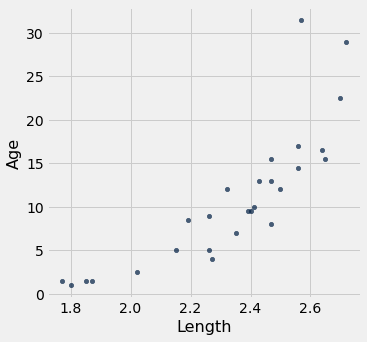

In [13]:
dugong.scatter('Length', 'Age')

In [14]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

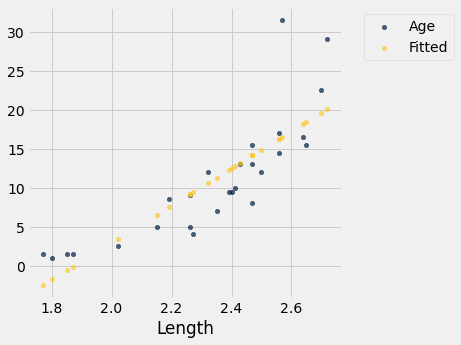

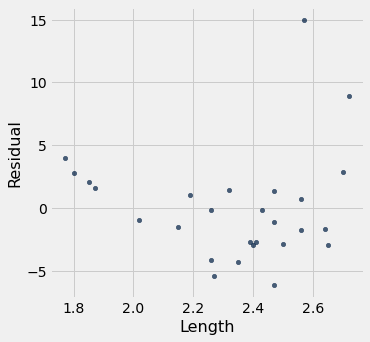

In [15]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [16]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


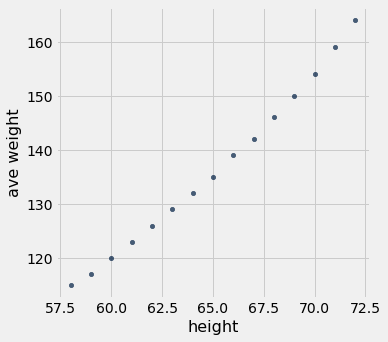

In [17]:
us_women.scatter('height')

In [18]:
correlation(us_women, 'height', 'ave weight')

0.9954947677842161

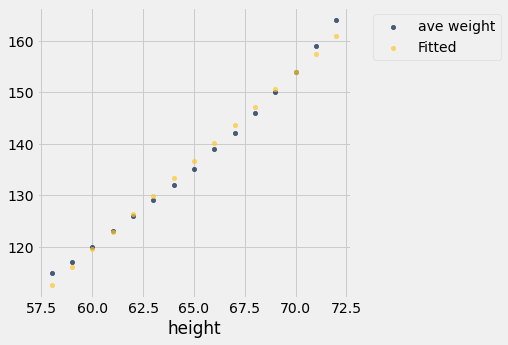

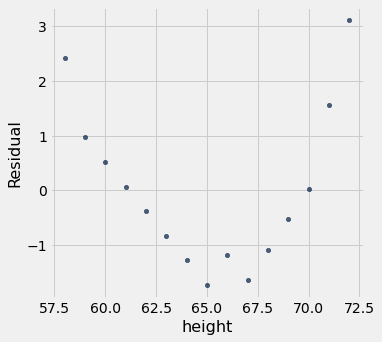

In [19]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [20]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [21]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [22]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [23]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


In [24]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [25]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

## A Measure of Clustering ##

In [26]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

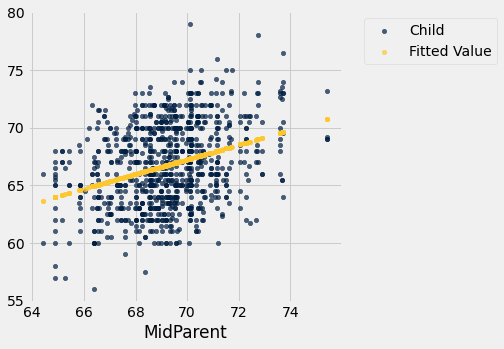

In [27]:
plot_fitted(heights, 'MidParent', 'Child')

In [28]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_predictions_sd

1.148145168378806

In [29]:
child_observed_sd = np.std(heights.column('Child'))
child_observed_sd

3.5773346010057634

In [30]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [31]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [32]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

In [33]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [34]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


In [ ]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [ ]:
correlation(hybrid, 'acceleration', 'mpg')

In [ ]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [ ]:
np.std(heights.column('Child')) ** 2

In [ ]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

In [ ]:
np.std(heights.column('Fitted Value')) ** 2

In [ ]:
np.std(dugong.column('Age')) ** 2

In [ ]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

In [ ]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
r

In [ ]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

In [ ]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

In [ ]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

In [ ]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))